<a href="https://colab.research.google.com/github/thim0o/CoinDetector/blob/master/coins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount the Drive and dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp -r /content/drive/My\ Drive/PhysicalComputing/datasets/ /content/

In [5]:
import os

images_classes_path = '/content/datasets/'
cropped_imgs_path = '/content/datasets/'

images_classes_list = os.listdir(images_classes_path)

num_classes = len(images_classes_list)
print("total {} classes".format(num_classes))

total 6 classes


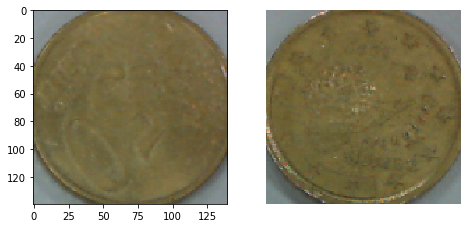

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

def show_dir_images(folder, n_to_show):
    plt.figure(figsize=(16,16))
    dir_imgs_list = folder
    images = os.listdir(dir_imgs_list)[:n_to_show]
    
    for i in range(n_to_show):
        img = Image.open(dir_imgs_list + '/' + images[i])
        plt.subplot(n_to_show/4+1, 4, i+1)
        plt.imshow(img)
    plt.axis('off')

show_dir_images(images_classes_path + images_classes_list[0],2)

# Preprocessing

In [7]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image      
import random

Using TensorFlow backend.


In [0]:
epochs = 100
learning_rate = 0.0001
classes = 6

In [9]:
datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        samplewise_std_normalization=True,
        horizontal_flip=True,
        validation_split= 0.3
)

train_generator = datagen.flow_from_directory(
        cropped_imgs_path,
        target_size=(224, 224),
        batch_size=64,
        class_mode='categorical',
        shuffle=True,
        subset="training"
)

val_generator = datagen.flow_from_directory(
        cropped_imgs_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=True,
        subset="validation"
)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:355: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 2100 images belonging to 6 classes.
Found 900 images belonging to 6 classes.


# Model configuration

In [0]:
import keras
from keras.layers import Input
from keras.models import Sequential, Model
from keras.optimizers import SGD, Adam 

from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, GlobalAveragePooling2D, BatchNormalization

## Create a Keras model

In [0]:
def init_model():
    input_shape = (224, 224, 3)
    
    model = Sequential([
    Conv2D(64, (3, 3), input_shape=input_shape, padding="same", activation="relu"),
    Conv2D(64, (3, 3), activation="relu", padding="same"),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(128, (3, 3), activation="relu", padding="same",),
    Conv2D(128, (3, 3), activation="relu", padding="same",),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(256, (3, 3), activation="relu", padding="same",),
    Conv2D(256, (3, 3), activation="relu", padding="same",),
    Conv2D(256, (3, 3), activation="relu", padding="same",),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(512, (3, 3), activation="relu", padding="same",),
    Conv2D(512, (3, 3), activation="relu", padding="same",),
    Conv2D(512, (3, 3), activation="relu", padding="same",),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(512, (3, 3), activation="relu", padding="same",),
    Conv2D(512, (3, 3), activation="relu", padding="same",),
    Conv2D(512, (3, 3), activation="relu", padding="same",),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    Dense(4096, activation="relu"),
    Dense(4096, activation="relu"),
    Dense(1000, activation="softmax")
    ])
    
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer="adam", metrics=["accuracy"])
    
    return model

In [12]:
model = init_model()
model.summary()







Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 256)

https://keras.io/getting-started/functional-api-guide/

https://keras.io/models/model/


## Using an existing model from Keras

In [0]:
from keras.applications.vgg16 import VGG16

In [14]:
base_model = VGG16(include_top=True, weights='imagenet', input_shape=(224, 224, 3))
base_model.summary()

553467904/553467096 [==============================] - 13s 0us/step






Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_____________________________________________________

### Remove the last 4 layers

In [15]:
for i in range(4):
  base_model.layers.pop()
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

#Fine-tuning the model

In [16]:
x = base_model.output
x = BatchNormalization()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(rate = .2)(x)
predictions = Dense(num_classes, activation='softmax')(x)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [17]:
model = Model(inputs=base_model.inputs, outputs=predictions)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

We will freeze and only train the last 7 layers.

In [18]:
for layer in model.layers[:]:
    layer.trainable = True 
    
for layer in model.layers[:-7]:
    layer.trainable = False

for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False
19 flatten False
20 fc1 True
21 fc2 True
22 predictions True
23 batch_normalization_1 True
24 dense_4 True
25 dropout_1 True
26 dense_5 True


In [0]:
optimizer = Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Train the model

In [0]:
from keras.callbacks import ModelCheckpoint

In [0]:
checkpoint = ModelCheckpoint('model.h5', 
                             monitor='val_acc', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='max')

In [22]:

model.fit_generator(generator=train_generator, 
                              steps_per_epoch=len(train_generator), 
                              validation_data=val_generator, 
                              validation_steps=len(val_generator),
                              epochs=1,
                              callbacks=[checkpoint])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/1
33/33 [==============================] - 40s 1s/step - loss: 1.1319 - acc: 0.8503 - val_loss: 0.5430 - val_acc: 0.9444

Epoch 00001: val_acc improved from -inf to 0.94444, saving model to model.h5


Now, unfreeze all layers!

In [0]:
for layer in model.layers[:]:
    layer.trainable = True

In [0]:
params = model.fit_generator(generator=train_generator, 
                                steps_per_epoch=len(train_generator), 
                                validation_data=val_generator, 
                                validation_steps=len(val_generator),
                                epochs=10,
                                callbacks=[checkpoint])

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1/10
33/33 [==============================] - 36s 1s/step - loss: 0.2035 - acc: 0.9818 - val_loss: 0.1064 - val_acc: 0.9789

Epoch 00001: val_acc improved from 0.94444 to 0.97889, saving model to model.h5
Epoch 2/10
33/33 [==============================] - 30s 912ms/step - loss: 0.0889 - acc: 0.9815 - val_loss: 0.2383 - val_acc: 0.9322

Epoch 00002: val_acc did not improve from 0.97889
Epoch 3/10
33/33 [==============================] - 30s 921ms/step - loss: 0.0429 - acc: 0.9905 - val_loss: 0.1191 - val_acc: 0.9622

Epoch 00003: val_acc did not improve from 0.97889
Epoch 4/10
33/33 [==============================] - 30s 907ms/step - loss: 0.0292 - acc: 0.9943 - val_loss: 0.1243 - val_acc: 0.9689

Epoch 00004: val_acc did not improve from 0.97889
Epoch 5/10
33/33 [==============================] - 30s 917ms/step - loss: 0.0282 - acc: 0.9914 - val_loss: 0.1045 - val_acc: 0.9656

Epoch 00005: val_acc did not improve from 0.97889
Epoch 6/10
33/33 [==============================] - 3

# Test the model on some real images

In [0]:
import matplotlib.image as mpimg
import numpy as np

0.9968669   :   2euro
0.0015106844   :   1euro
0.00096122426   :   20cent


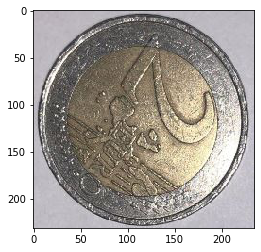

In [32]:
def predict_images(path):
    img = mpimg.imread(path)
    plt.imshow(img)


    image = Image.open(path)
    image = image.convert('RGB')
    image = image.resize((224, 224))

    probabilities = model.predict(np.expand_dims(image, axis=0))
    type_list = tuple(zip(val_generator.class_indices.values(), val_generator.class_indices.keys()))

    for i in probabilities.argsort()[0][-3:][::-1]: 
         print(probabilities[0][i], "  :  " , type_list[i][1])

predict_images('/content/2euro_test2.JPG')